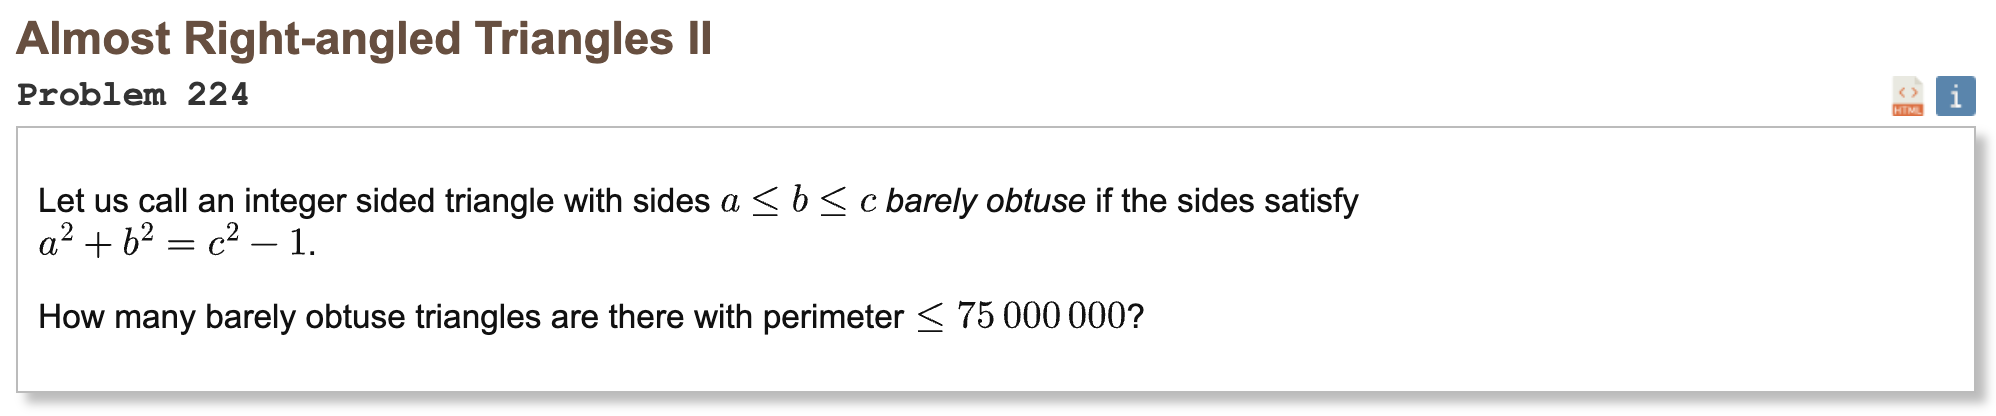

## Initial approach

* rewrite the condition as a “right triangle plus one” relation on the squared sides
* this special relation is stable under three simple integer transforms that map one valid triple to new valid triples
* start from the smallest valid triple and build a tree by repeatedly applying those transforms
* every generated triple is larger, so if its perimeter is above the limit you can stop exploring that branch
* count only triples that already satisfy the side ordering and the triangle inequality
* use an explicit stack for depth first search so it stays fast and memory safe

In [1]:
LIMIT = 75_000_000

MATS = (
    ((1, -2, 2), (2, -1, 2), (2, -2, 3)),
    ((1, 2, 2), (2, 1, 2), (2, 2, 3)),
    ((-1, 2, 2), (-2, 1, 2), (-2, 2, 3)),
)

def apply_mat(M, a, b, c):
    x = M[0][0] * a + M[0][1] * b + M[0][2] * c
    y = M[1][0] * a + M[1][1] * b + M[1][2] * c
    z = M[2][0] * a + M[2][1] * b + M[2][2] * c
    return x, y, z

def solve():
    stack = [(2, 2, 3)]
    count = 0

    while stack:
        a, b, c = stack.pop()
        p = a + b + c
        if p > LIMIT:
            continue

        if a <= b and a + b > c and a * a + b * b == c * c - 1:
            count += 1

        for M in MATS:
            x, y, z = apply_mat(M, a, b, c)
            if x > 0 and y > 0 and z > 0:
                if x + y + z <= LIMIT:
                    stack.append((x, y, z))

    return count

In [2]:
%%time

result = solve()
print("Result:", result)

Result: 4137330
CPU times: user 8.72 s, sys: 52.8 ms, total: 8.77 s
Wall time: 8.81 s
